# Telco Customer Churn Analysis - Data Cleaning & EDA

## Introduction
This analysis explores a telecommunications customer dataset to understand factors influencing customer churn. The dataset contains 7,043 customers with 50 features including demographic information, service details, and churn-related metrics.

## Data Loading and Initial Exploration

### Life Cycle of a Data Cleaning and Exploratory Data Analysis
1. Understanding the Problem Statement
Define the problem clearly.
Identify objectives and success metrics.
Understand constraints and requirements.
2. Data Collection
Gather data from relevant sources.
Ensure data quality and completeness.
Consider data privacy and legal constraints.
3. Data Checks to Perform
Check for missing values.
Identify duplicates.
Verify data types and ranges.
Detect outliers and inconsistencies.
4. Exploratory Data Analysis (EDA)
Visualize data distributions.
Explore correlations between features.
Identify patterns, trends, and anomalies.

# Importing necessary libraries for data analysis and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading the dataset from the specified file path

In [92]:
df = pd.read_csv(r"C:\Users\bhuva\Downloads\telco.csv")

In [4]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


## The dataset contains 7,043 rows and 50 columns, showing a comprehensive view of customer information including demographics, services used, charges, and churn status.

In [5]:
df.shape

(7043, 50)

##  The dataset contains mixed data types (8 float, 11 int, 31 object). Several columns have significant missing values that need to be addressed.

df.info()

In [7]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [8]:
pd.set_option('display.max.columns',None)

In [9]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

# Data Cleaning

In [10]:
df['Offer'].nunique()

5

In [11]:
df['Offer'].unique()

array([nan, 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [12]:
df['Offer'] = df['Offer'].fillna('NO OFFER')
df['Offer']

0       NO OFFER
1        Offer E
2        Offer D
3        Offer C
4        Offer C
          ...   
7038    NO OFFER
7039     Offer C
7040    NO OFFER
7041    NO OFFER
7042    NO OFFER
Name: Offer, Length: 7043, dtype: object

In [13]:
df['Offer'].isnull().sum()

0

In [14]:
df['Internet Type'].isnull().sum()

1526

In [15]:
df['Internet Type'].nunique()

3

In [16]:
df['Internet Type'].unique() 

array(['DSL', 'Fiber Optic', 'Cable', nan], dtype=object)

In [17]:
df['Internet Type'] = df['Internet Type'].fillna('NO INTERNET')
df['Internet Type']

0               DSL
1       Fiber Optic
2       Fiber Optic
3       Fiber Optic
4       Fiber Optic
           ...     
7038    NO INTERNET
7039          Cable
7040    Fiber Optic
7041            DSL
7042    Fiber Optic
Name: Internet Type, Length: 7043, dtype: object

In [18]:
df['Internet Type'].isnull().sum()

0

In [19]:
df['Churn Category'].isnull().sum()

5174

In [20]:
df['Churn Category'].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [21]:
df['Churn Category'].nunique()

5

In [22]:
df['Churn Category'] = df['Churn Category'].fillna('LEFT WITHOUT REASON')
df['Churn Category']

0                Competitor
1                Competitor
2                Competitor
3           Dissatisfaction
4                     Price
               ...         
7038    LEFT WITHOUT REASON
7039    LEFT WITHOUT REASON
7040    LEFT WITHOUT REASON
7041    LEFT WITHOUT REASON
7042    LEFT WITHOUT REASON
Name: Churn Category, Length: 7043, dtype: object

In [23]:
df['Churn Reason'].isnull().sum()

5174

In [24]:
df['Churn Reason'].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

In [25]:
df['Churn Reason'] = df['Churn Reason'].fillna('NO reason')
df['Churn Reason']

0       Competitor offered more data
1       Competitor made better offer
2       Competitor made better offer
3          Limited range of services
4                 Extra data charges
                    ...             
7038                       NO reason
7039                       NO reason
7040                       NO reason
7041                       NO reason
7042                       NO reason
Name: Churn Reason, Length: 7043, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [27]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download  

## Dropping the Duplicates

In [28]:
df.drop_duplicates()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NO OFFER,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,Landers,92285,34.341737,-116.539416,2182,Q3,No,0,72,NO OFFER,Yes,22.77,No,No,NO INTERNET,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,LEFT WITHOUT REASON,NO reason
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,92301,34.667815,-117.536183,18980,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,LEFT WITHOUT REASON,NO reason
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,92304,34.559882,-115.637164,42,Q3,Yes,4,72,NO OFFER,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,LEFT WITHOUT REASON,NO reason
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,92305,34.167800,-116.864330,301,Q3,Yes,1,11,NO OFFER,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,LEFT WITHOUT REASON,NO reason


In [29]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NO OFFER,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,Landers,92285,34.341737,-116.539416,2182,Q3,No,0,72,NO OFFER,Yes,22.77,No,No,NO INTERNET,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,LEFT WITHOUT REASON,NO reason
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,92301,34.667815,-117.536183,18980,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,LEFT WITHOUT REASON,NO reason
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,92304,34.559882,-115.637164,42,Q3,Yes,4,72,NO OFFER,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,LEFT WITHOUT REASON,NO reason
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,92305,34.167800,-116.864330,301,Q3,Yes,1,11,NO OFFER,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,LEFT WITHOUT REASON,NO reason


In [30]:
df = df.drop(columns = ['Zip Code','Quarter'])
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Latitude,Longitude,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,34.023810,-118.156582,68701,No,0,1,NO OFFER,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,34.044271,-118.185237,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,34.108833,-118.229715,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,33.936291,-118.332639,27778,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,33.972119,-118.020188,26265,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,Landers,34.341737,-116.539416,2182,No,0,72,NO OFFER,Yes,22.77,No,No,NO INTERNET,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,LEFT WITHOUT REASON,NO reason
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,34.667815,-117.536183,18980,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,LEFT WITHOUT REASON,NO reason
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,34.559882,-115.637164,42,Yes,4,72,NO OFFER,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,LEFT WITHOUT REASON,NO reason
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,34.167800,-116.864330,301,Yes,1,11,NO OFFER,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,LEFT WITHOUT REASON,NO reason


In [31]:
df.describe()

,Age,Number of Dependents,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


# Insights from Numerical Data¶
After examining the descriptive statistics of the numerical features, the following insights can be drawn:

## Age:

### Mean age of customers is ~46.5 years.
### Standard deviation is ~16.75, indicating a moderately wide spread.
### Youngest customer is 19 and oldest is 80, showing a diverse age range.


## Number of Dependents:

### Most customers have 0 dependents (median = 0).
### Maximum number of dependents is 9, but mean is only ~0.47, suggesting most customers live alone or with few dependents.
### Location (Zip Code, Latitude, Longitude, Population):


## Customer Engagement:

### Number of Referrals: Most customers have referred 0 people; maximum referrals = 11.
### Tenure in Months: Average tenure is ~32 months, ranging from 1 to 72 months.

## Service Usage and Billing:

### Avg Monthly Long Distance Charges: Mean ~22.96, maximum ~50.
### Avg Monthly GB Download: Mean ~20.52 GB; some customers download up to 85 GB.
### Monthly Charges: Average monthly bill ~64.76, with a max of 118.75.
### Total Charges: Mean ~2,280, but max ~8,684, showing some high-value customers.
### Total Refunds, Extra Data, Long Distance Charges: Some customers have unusually high extra charges, suggesting outliers.

## Customer Metrics:

### Satisfaction Score: Average score ~3.24, ranging 1–5.
### Churn Score: Mean ~58.5, max 96, showing that some customers are highly likely to churn.
### CLTV (Customer Lifetime Value): Average ~4,400; high CLTV customers (max 6,500) are critical for retention.


## Observations:

### Many numerical features are moderately skewed (e.g., Tenure, Total Charges, Extra Charges).
### There are clear outliers in several columns (Population, Total Charges, Extra Data Charges, Long Distance Charges).
### Most customers have low numbers of dependents and referrals.
High churn risk customers can be identified using Churn Score and high-value customers using CLTV.

In [33]:
df = df.drop(columns = 'Age')
df

,Customer ID,Gender,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Latitude,Longitude,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,No,Yes,No,No,0,United States,California,Los Angeles,34.023810,-118.156582,68701,No,0,1,NO OFFER,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,No,Yes,Yes,Yes,1,United States,California,Los Angeles,34.044271,-118.185237,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,No,Yes,No,Yes,3,United States,California,Los Angeles,34.108833,-118.229715,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,No,Yes,Yes,Yes,1,United States,California,Inglewood,33.936291,-118.332639,27778,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,No,Yes,Yes,Yes,1,United States,California,Whittier,33.972119,-118.020188,26265,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,No,No,No,No,0,United States,California,Landers,34.341737,-116.539416,2182,No,0,72,NO OFFER,Yes,22.77,No,No,NO INTERNET,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,LEFT WITHOUT REASON,NO reason
7039,6840-RESVB,Male,No,No,Yes,Yes,2,United States,California,Adelanto,34.667815,-117.536183,18980,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,LEFT WITHOUT REASON,NO reason
7040,2234-XADUH,Female,No,No,Yes,Yes,2,United States,California,Amboy,34.559882,-115.637164,42,Yes,4,72,NO OFFER,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,LEFT WITHOUT REASON,NO reason
7041,4801-JZAZL,Female,No,No,Yes,Yes,2,United States,California,Angelus Oaks,34.167800,-116.864330,301,Yes,1,11,NO OFFER,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,LEFT WITHOUT REASON,NO reason


In [34]:
df = df.drop(columns = 'Number of Dependents')
df

,Customer ID,Gender,Under 30,Senior Citizen,Married,Dependents,Country,State,City,Latitude,Longitude,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,No,Yes,No,No,United States,California,Los Angeles,34.023810,-118.156582,68701,No,0,1,NO OFFER,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,No,Yes,Yes,Yes,United States,California,Los Angeles,34.044271,-118.185237,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,No,Yes,No,Yes,United States,California,Los Angeles,34.108833,-118.229715,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,No,Yes,Yes,Yes,United States,California,Inglewood,33.936291,-118.332639,27778,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,No,Yes,Yes,Yes,United States,California,Whittier,33.972119,-118.020188,26265,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,No,No,No,No,United States,California,Landers,34.341737,-116.539416,2182,No,0,72,NO OFFER,Yes,22.77,No,No,NO INTERNET,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,LEFT WITHOUT REASON,NO reason
7039,6840-RESVB,Male,No,No,Yes,Yes,United States,California,Adelanto,34.667815,-117.536183,18980,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,LEFT WITHOUT REASON,NO reason
7040,2234-XADUH,Female,No,No,Yes,Yes,United States,California,Amboy,34.559882,-115.637164,42,Yes,4,72,NO OFFER,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,LEFT WITHOUT REASON,NO reason
7041,4801-JZAZL,Female,No,No,Yes,Yes,United States,California,Angelus Oaks,34.167800,-116.864330,301,Yes,1,11,NO OFFER,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,LEFT WITHOUT REASON,NO reason


# Univariate Analysis

In [35]:
df_new = df[['Customer Status','Gender','Under 30','Senior Citizen','Married']]
df_new

,Customer Status,Gender,Under 30,Senior Citizen,Married
0,Churned,Male,No,Yes,No
1,Churned,Female,No,Yes,Yes
2,Churned,Male,No,Yes,No
3,Churned,Female,No,Yes,Yes
4,Churned,Female,No,Yes,Yes
...,...,...,...,...,...
7038,Stayed,Female,No,No,No
7039,Stayed,Male,No,No,Yes
7040,Stayed,Female,No,No,Yes
7041,Stayed,Female,No,No,Yes


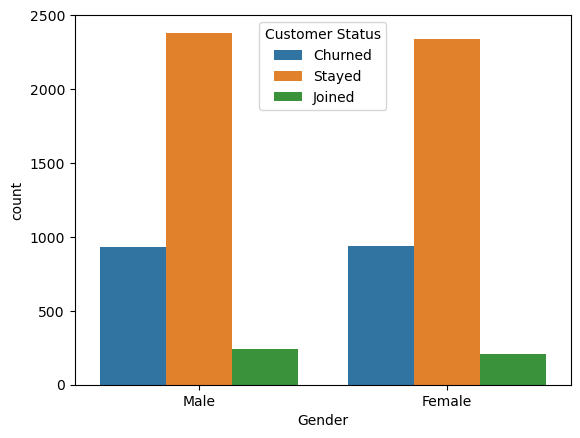

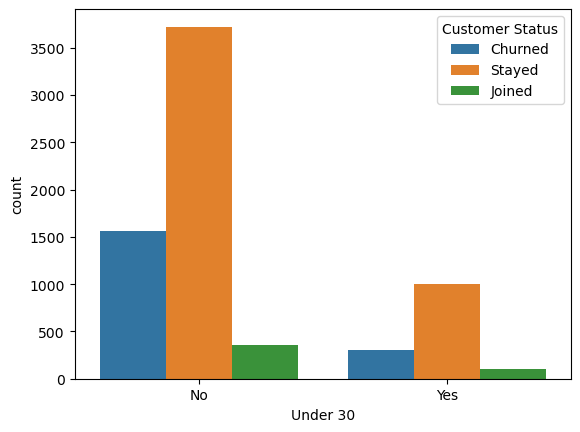

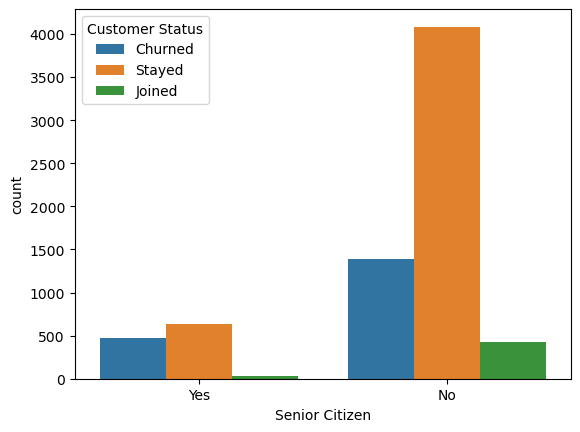

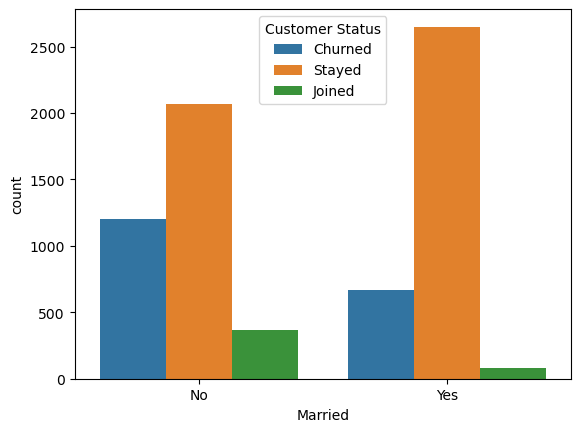

In [36]:
for i, predictor in  enumerate(df_new.drop(columns = ['Customer Status'])):
    plt.figure()
    sns.countplot(data = df_new, x = predictor, hue = 'Customer Status')
    plt.show()

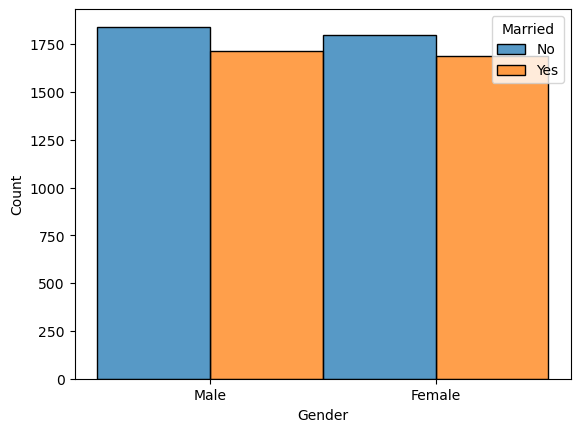

In [37]:
sns.histplot(x='Gender', hue='Married',data = df_new, stat="count", multiple="dodge")
plt.show()

In [38]:
df['Country'].nunique()

1

In [39]:
df

,Customer ID,Gender,Under 30,Senior Citizen,Married,Dependents,Country,State,City,Latitude,Longitude,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,No,Yes,No,No,United States,California,Los Angeles,34.023810,-118.156582,68701,No,0,1,NO OFFER,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,No,Yes,Yes,Yes,United States,California,Los Angeles,34.044271,-118.185237,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,No,Yes,No,Yes,United States,California,Los Angeles,34.108833,-118.229715,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,No,Yes,Yes,Yes,United States,California,Inglewood,33.936291,-118.332639,27778,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,No,Yes,Yes,Yes,United States,California,Whittier,33.972119,-118.020188,26265,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,No,No,No,No,United States,California,Landers,34.341737,-116.539416,2182,No,0,72,NO OFFER,Yes,22.77,No,No,NO INTERNET,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,LEFT WITHOUT REASON,NO reason
7039,6840-RESVB,Male,No,No,Yes,Yes,United States,California,Adelanto,34.667815,-117.536183,18980,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,LEFT WITHOUT REASON,NO reason
7040,2234-XADUH,Female,No,No,Yes,Yes,United States,California,Amboy,34.559882,-115.637164,42,Yes,4,72,NO OFFER,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,LEFT WITHOUT REASON,NO reason
7041,4801-JZAZL,Female,No,No,Yes,Yes,United States,California,Angelus Oaks,34.167800,-116.864330,301,Yes,1,11,NO OFFER,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,LEFT WITHOUT REASON,NO reason


In [40]:
dd = df.select_dtypes(int).corr()
dd

,Population,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Total Extra Data Charges,Satisfaction Score,Churn Score,CLTV
Population,1.000000,-0.007704,-0.012102,0.024759,0.012031,-0.031056,0.020012,-0.000648
Number of Referrals,-0.007704,1.000000,0.326975,0.038575,0.000350,0.188926,-0.202209,0.122843
Tenure in Months,-0.012102,0.326975,1.000000,0.049119,0.082266,0.210557,-0.224982,0.396292
Avg Monthly GB Download,0.024759,0.038575,0.049119,1.000000,0.088939,-0.091657,0.022421,0.023043
Total Extra Data Charges,0.012031,0.000350,0.082266,0.088939,1.000000,-0.010472,0.008343,0.042540
Satisfaction Score,-0.031056,0.188926,0.210557,-0.091657,-0.010472,1.000000,-0.495144,0.075811
Churn Score,0.020012,-0.202209,-0.224982,0.022421,0.008343,-0.495144,1.000000,-0.079232
CLTV,-0.000648,0.122843,0.396292,0.023043,0.042540,0.075811,-0.079232,1.000000


In [41]:
df['Customer Status'].unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

In [42]:
df['Customer Status'] = df['Customer Status'].apply(lambda x: str(x))
df['Customer Status']

0       Churned
1       Churned
2       Churned
3       Churned
4       Churned
         ...   
7038     Stayed
7039     Stayed
7040     Stayed
7041     Stayed
7042     Stayed
Name: Customer Status, Length: 7043, dtype: object

In [43]:
df['Customer Status'] = df['Customer Status'].str.replace('Churned','1', regex = True)
df['Customer Status'] = df['Customer Status'].str.replace('Stayed','0', regex = True)
df['Customer Status'] = df['Customer Status'].str.replace('Stayed','+1', regex = True)
df['Customer Status']

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Customer Status, Length: 7043, dtype: object

In [44]:
for x in df.index:
    if df.loc[x, "Customer Status"] == '+1':
        df.drop(x,inplace=True)
df

,Customer ID,Gender,Under 30,Senior Citizen,Married,Dependents,Country,State,City,Latitude,Longitude,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,No,Yes,No,No,United States,California,Los Angeles,34.023810,-118.156582,68701,No,0,1,NO OFFER,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,1,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,No,Yes,Yes,Yes,United States,California,Los Angeles,34.044271,-118.185237,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,1,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,No,Yes,No,Yes,United States,California,Los Angeles,34.108833,-118.229715,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,1,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,No,Yes,Yes,Yes,United States,California,Inglewood,33.936291,-118.332639,27778,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,1,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,No,Yes,Yes,Yes,United States,California,Whittier,33.972119,-118.020188,26265,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,1,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,No,No,No,No,United States,California,Landers,34.341737,-116.539416,2182,No,0,72,NO OFFER,Yes,22.77,No,No,NO INTERNET,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,0,No,45,5306,LEFT WITHOUT REASON,NO reason
7039,6840-RESVB,Male,No,No,Yes,Yes,United States,California,Adelanto,34.667815,-117.536183,18980,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,0,No,59,2140,LEFT WITHOUT REASON,NO reason
7040,2234-XADUH,Female,No,No,Yes,Yes,United States,California,Amboy,34.559882,-115.637164,42,Yes,4,72,NO OFFER,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,0,No,71,5560,LEFT WITHOUT REASON,NO reason
7041,4801-JZAZL,Female,No,No,Yes,Yes,United States,California,Angelus Oaks,34.167800,-116.864330,301,Yes,1,11,NO OFFER,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,0,No,59,2793,LEFT WITHOUT REASON,NO reason


In [45]:
df['Customer Status'].isnull().sum()

0

In [46]:
df.select_dtypes(int)

,Population,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Total Extra Data Charges,Satisfaction Score,Churn Score,CLTV
0,68701,0,1,8,20,3,91,5433
1,55668,1,8,17,0,3,69,5302
2,47534,0,18,52,0,2,81,3179
3,27778,1,25,12,0,2,88,5337
4,26265,1,37,14,0,2,67,2793
...,...,...,...,...,...,...,...,...
7038,2182,0,72,0,0,5,45,5306
7039,18980,1,24,24,0,3,59,2140
7040,42,4,72,59,0,4,71,5560
7041,301,1,11,17,0,4,59,2793


# Correlation of the Data

In [47]:
dd1 = df.select_dtypes(int).corr()
dd1

,Population,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Total Extra Data Charges,Satisfaction Score,Churn Score,CLTV
Population,1.000000,-0.007704,-0.012102,0.024759,0.012031,-0.031056,0.020012,-0.000648
Number of Referrals,-0.007704,1.000000,0.326975,0.038575,0.000350,0.188926,-0.202209,0.122843
Tenure in Months,-0.012102,0.326975,1.000000,0.049119,0.082266,0.210557,-0.224982,0.396292
Avg Monthly GB Download,0.024759,0.038575,0.049119,1.000000,0.088939,-0.091657,0.022421,0.023043
Total Extra Data Charges,0.012031,0.000350,0.082266,0.088939,1.000000,-0.010472,0.008343,0.042540
Satisfaction Score,-0.031056,0.188926,0.210557,-0.091657,-0.010472,1.000000,-0.495144,0.075811
Churn Score,0.020012,-0.202209,-0.224982,0.022421,0.008343,-0.495144,1.000000,-0.079232
CLTV,-0.000648,0.122843,0.396292,0.023043,0.042540,0.075811,-0.079232,1.000000


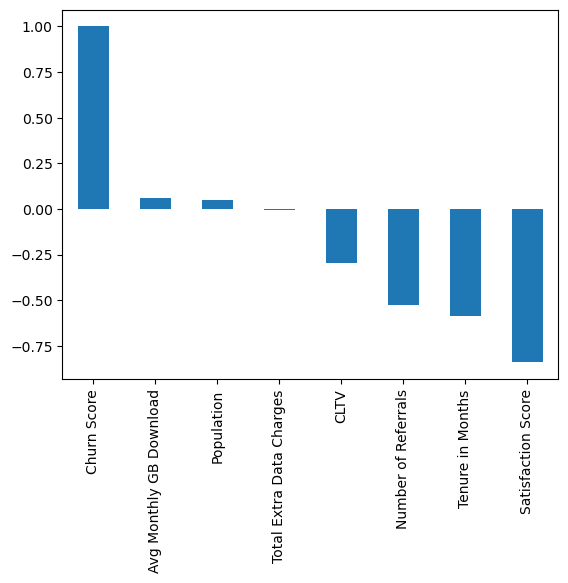

In [49]:
plt.figure(figure=(20,10))
dd1.corr()['Churn Score'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

# Correlation Heatmap of Numerical Features

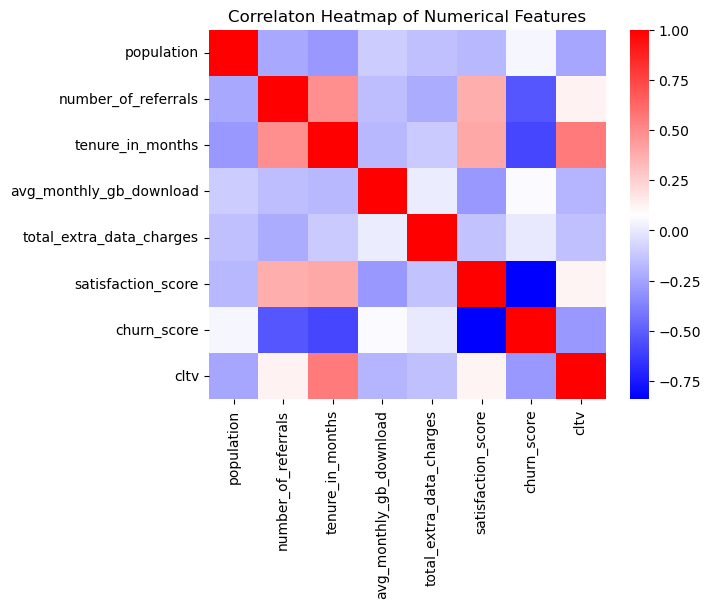

In [102]:
plt.figure(figure=(20,10))
sns.heatmap(dd1.corr(), cmap= 'bwr')
plt.title("Correlaton Heatmap of Numerical Features")
plt.show()

# Churn Categories (Excluding Non-Churners)

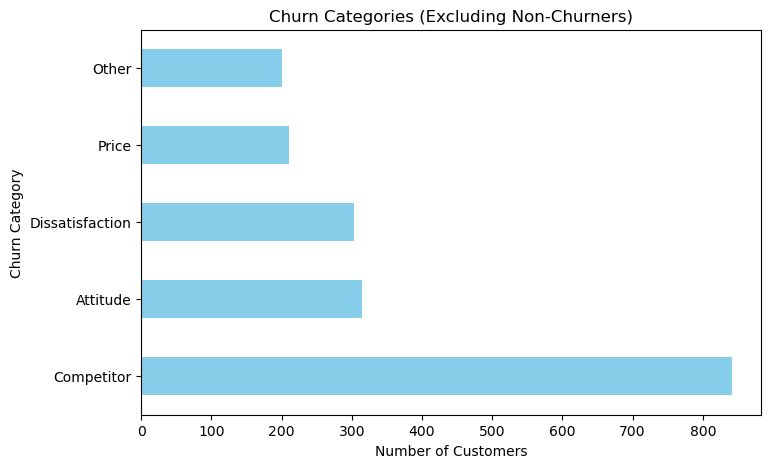

In [98]:
df['Churn Category'].value_counts().plot(kind='barh', figsize=(8,5), color="skyblue")

plt.title("Churn Categories (Excluding Non-Churners)")
plt.xlabel("Number of Customers")
plt.ylabel("Churn Category")
plt.show()

# Top 10 Churn Reasons

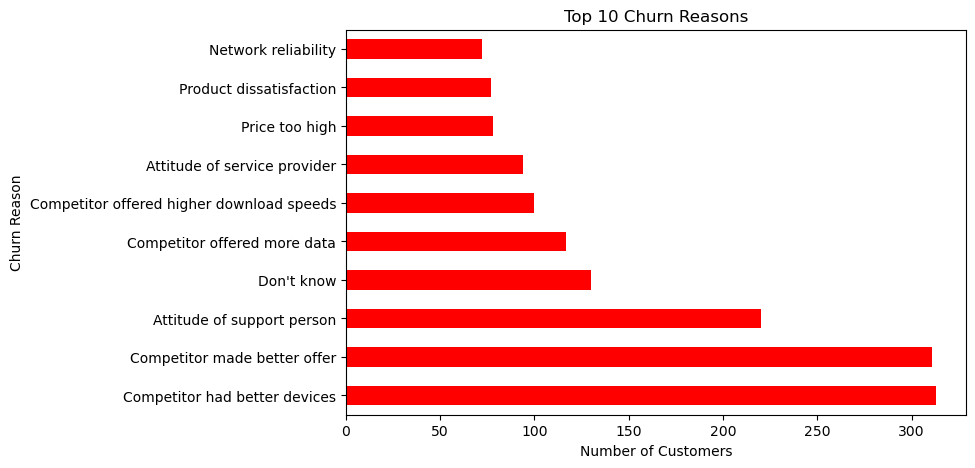

In [101]:
df['Churn Reason'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color="red")
plt.title("Top 10 Churn Reasons")
plt.xlabel("Number of Customers")
plt.show()


# Visualization Of The Data

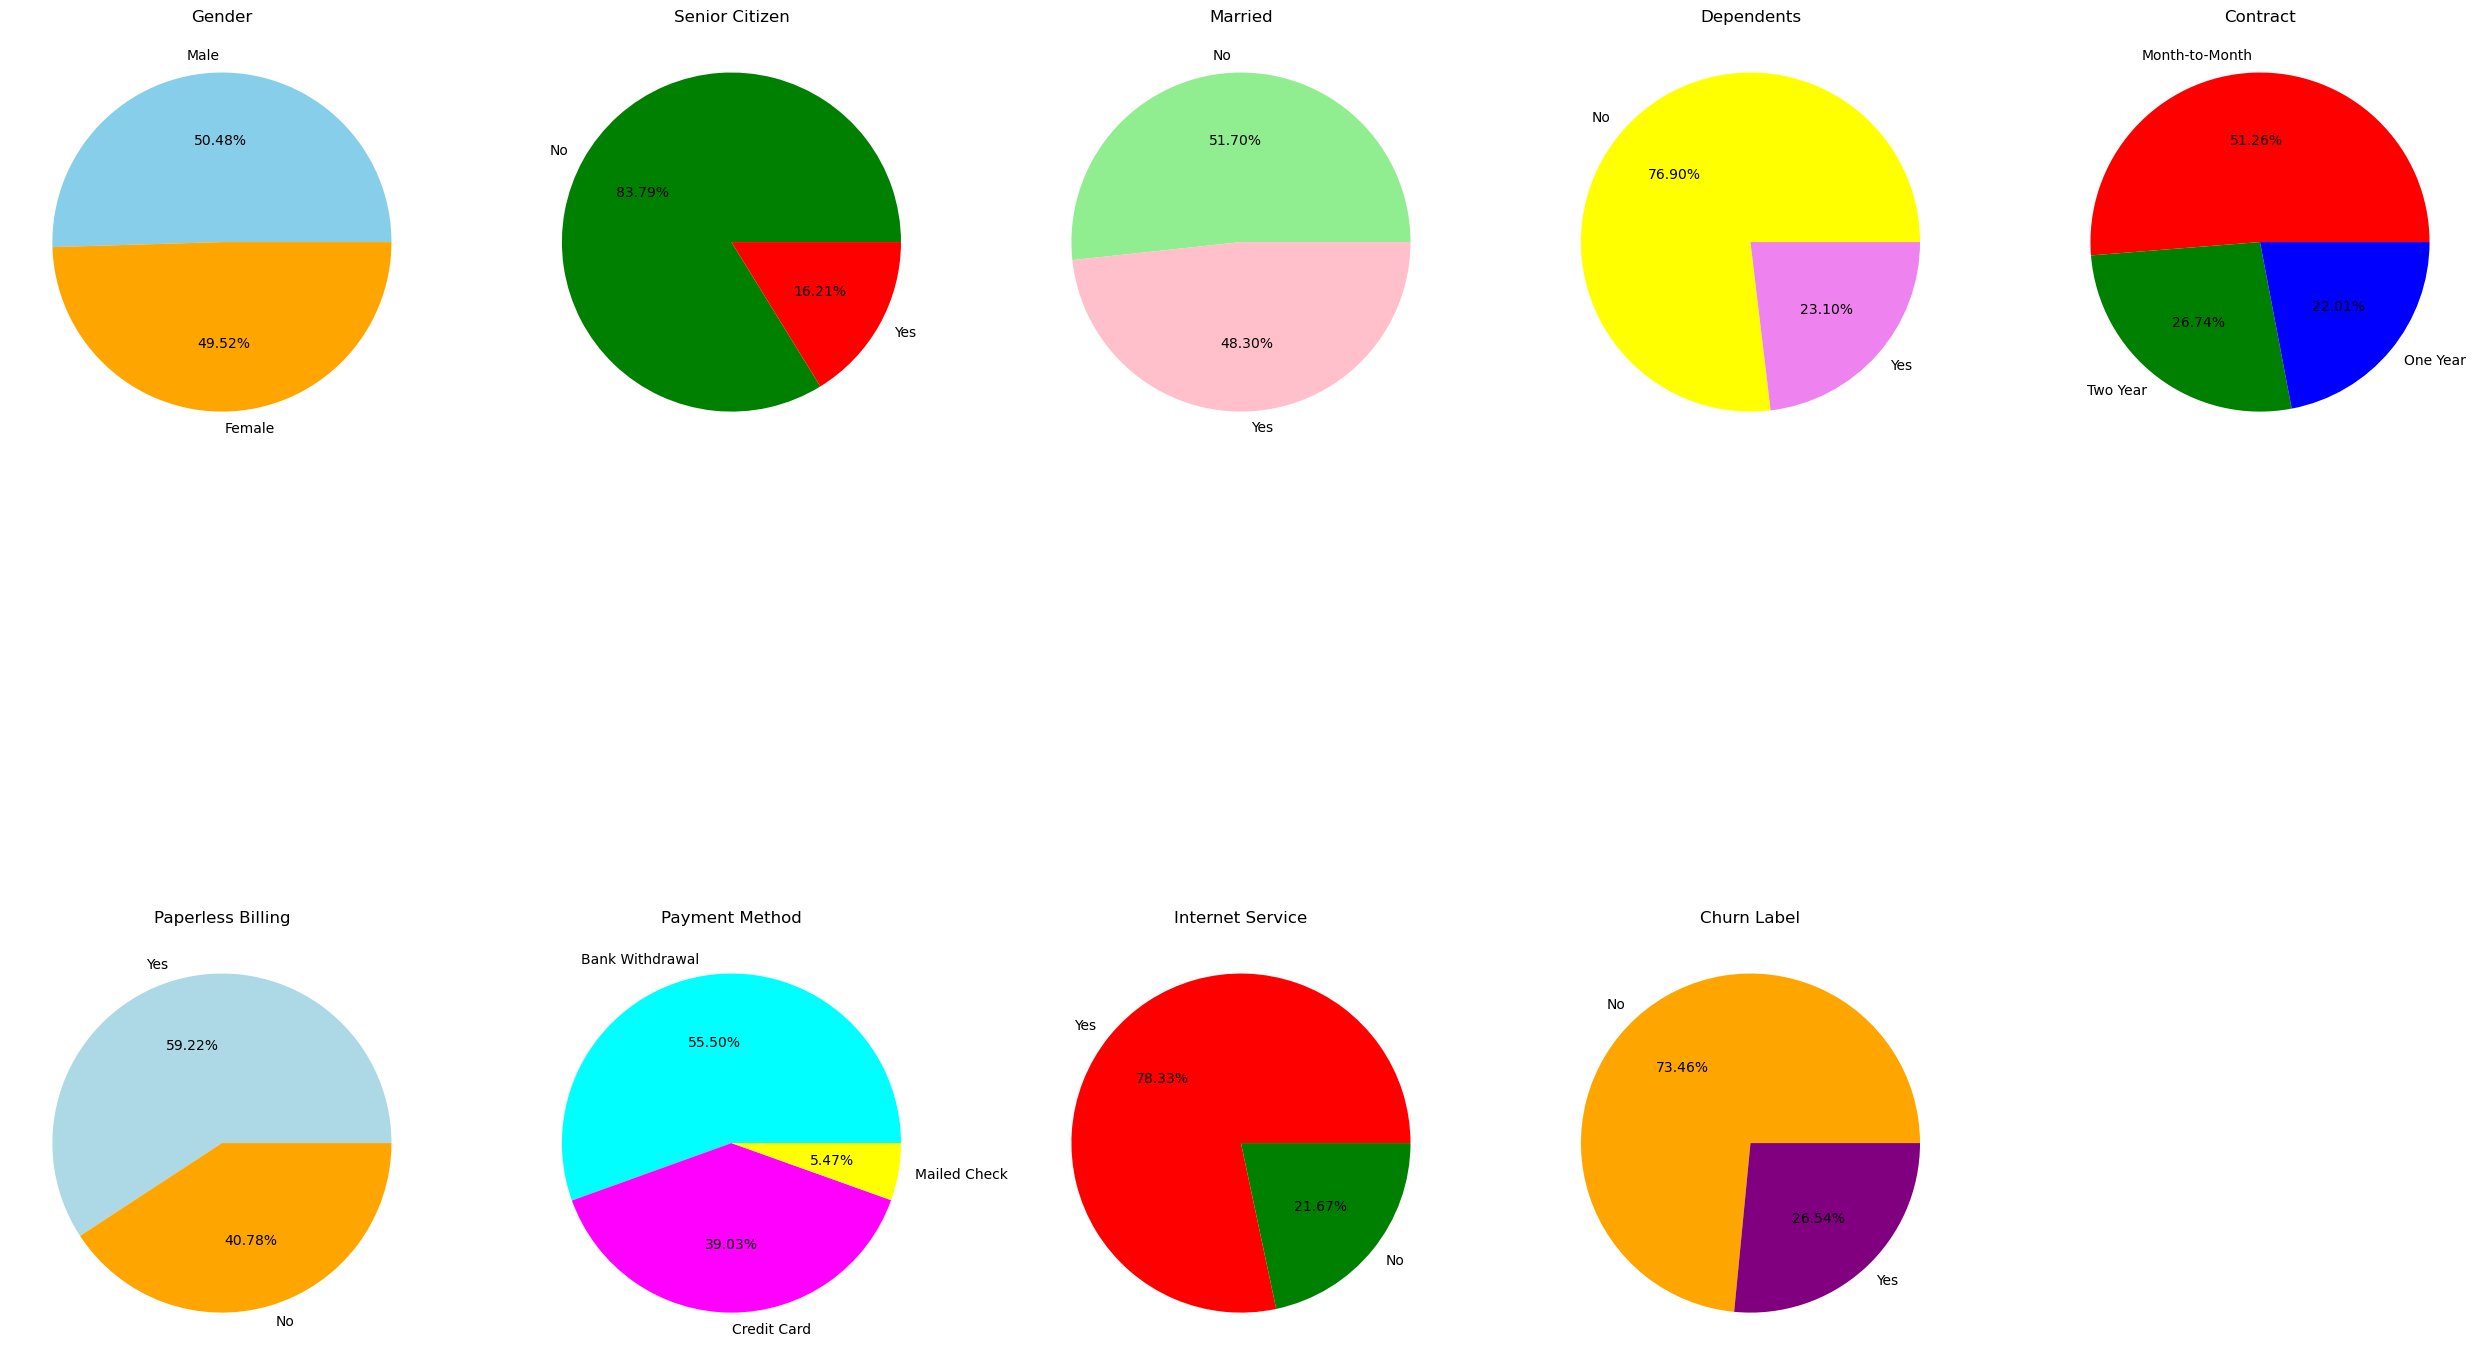

In [117]:
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (25, 20)


plt.subplot(2, 5, 1)
size = df['Gender'].value_counts()
labels = size.index
colors = ['skyblue','orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender')


plt.subplot(2, 5, 2)
size = df['Senior Citizen'].value_counts()
labels = size.index
colors = ['green','red']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Senior Citizen')

plt.subplot(2, 5, 3)
size = df['Married'].value_counts()
labels = size.index
colors = ['lightgreen','pink']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Married')


plt.subplot(2, 5, 4)
size = df['Dependents'].value_counts()
labels = size.index
colors = ['yellow','violet']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Dependents')


plt.subplot(2, 5, 5)
size = df['Contract'].value_counts()
labels = size.index
colors = ['red','green','blue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Contract')


plt.subplot(2, 5, 6)
size = df['Paperless Billing'].value_counts()
labels = size.index
colors = ['lightblue','orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Paperless Billing')


plt.subplot(2, 5, 7)
size = df['Payment Method'].value_counts()
labels = size.index
colors = ['cyan','magenta','yellow','grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Payment Method')


plt.subplot(2, 5, 8)
size = df['Internet Service'].value_counts()
labels = size.index
colors = ['red','green','blue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Internet Service')



plt.subplot(2, 5, 9)
size = df['Churn Label'].value_counts()
labels = size.index
colors = ['orange','purple']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Churn Label')

plt.tight_layout()
plt.show()